# Advanced Task: DataFrames and yfinance - Multi-Asset Portfolio Analysis

To develop a comprehensive Python script that downloads historical price data for multiple assets using yfinance, processes and cleans the data, and performs an in-depth analysis of a diversified portfolio's performance. This task will require advanced DataFrame manipulations, including handling missing data, adjusting for corporate actions, calculating portfolio metrics, and visualizing results.

### Data Acquisition:

Use the yfinance library to download historical daily price data for at least 10 different assets (e.g., stocks, ETFs, cryptocurrencies) over a 10-year period.
Ensure that the data includes both adjusted and unadjusted closing prices.

In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

ASPN - Aspen Aerogels, Inc. [Stock]

GME - GameStop Corp. [Stock]

BTC-USD - Bitcoin USD [Crypto]

ETC-USD - Ethereum Classic USD [Crypto]

SCHD - Schwab U.S. Dividend Equity [ETF]

SPLG - SPDR Portfolio S&P 500 [ETF]

SPY - SPDR S&P 500 ETF Trust [ETF]

BTCFX - Bitcoin Strategy ProFund Investor [Mutual]

EURUSD=X - EUR/USD [Forex]

JPY=X - USD/JPY [Forex]

In [8]:
ticker_list = ['ASPN', 'GME', 'BTC-USD', 'ETC-USD', 'SCHD', 'SPLG', 'SPY', 'BTCFX', 'EURUSD=X', 'JPY=X']

In [9]:
ticker_data = yf.download(ticker_list, period='10y', interval='1d', actions=True)

[*********************100%***********************]  10 of 10 completed


In [10]:
ticker_data

Price                      Adj Close                                  \
Ticker                          ASPN       BTC-USD  BTCFX    ETC-USD   
Date                                                                   
2014-08-25 00:00:00+00:00  10.720000           NaN    NaN        NaN   
2014-08-26 00:00:00+00:00  10.810000           NaN    NaN        NaN   
2014-08-27 00:00:00+00:00  10.920000           NaN    NaN        NaN   
2014-08-28 00:00:00+00:00  10.550000           NaN    NaN        NaN   
2014-08-29 00:00:00+00:00  10.630000           NaN    NaN        NaN   
...                              ...           ...    ...        ...   
2024-08-22 00:00:00+00:00  29.230000  60381.914062  22.16  19.492855   
2024-08-23 00:00:00+00:00  30.139999  64094.355469  22.16  20.592445   
2024-08-24 00:00:00+00:00        NaN  64178.992188    NaN  20.635164   
2024-08-25 00:00:00+00:00        NaN  64294.203125    NaN  20.111593   
2024-08-26 00:00:00+00:00        NaN           NaN    NaN        NaN   

Price                                                                  \
Ticker                     EURUSD=X        GME       JPY=X       SCHD   
Date                                                                    
2014-08-25 00:00:00+00:00       NaN   7.771744         NaN  28.157309   
2014-08-26 00:00:00+00:00  1.318896   7.837716  104.070000  28.171846   
2014-08-27 00:00:00+00:00  1.317020   7.878032  104.089996  28.193621   
2014-08-28 00:00:00+00:00  1.319087   7.911016  103.877998  28.186365   
2014-08-29 00:00:00+00:00  1.318496   7.792831  103.695999  28.251724   
...                             ...        ...         ...        ...   
2024-08-22 00:00:00+00:00  1.115536  22.120001  145.117996  82.339996   
2024-08-23 00:00:00+00:00  1.111716  22.209999  146.201996  83.519997   
2024-08-24 00:00:00+00:00       NaN        NaN         NaN        NaN   
2024-08-25 00:00:00+00:00       NaN        NaN         NaN        NaN   
2024-08-26 00:00:00+00:00  1.118944        NaN  143.973007        NaN   

Price                                             ...     Volume  \
Ticker                          SPLG         SPY  ...       ASPN   
Date                                              ...              
2014-08-25 00:00:00+00:00  19.662426  167.570129  ...    45800.0   
2014-08-26 00:00:00+00:00  19.750072  167.679001  ...    47700.0   
2014-08-27 00:00:00+00:00  19.750072  167.611954  ...    45100.0   
2014-08-28 00:00:00+00:00  19.720863  167.519928  ...   141400.0   
2014-08-29 00:00:00+00:00  19.720863  167.997009  ...    92500.0   
...                              ...         ...  ...        ...   
2024-08-22 00:00:00+00:00  65.419998  556.219971  ...  1583700.0   
2024-08-23 00:00:00+00:00  66.099998  562.130005  ...  1382400.0   
2024-08-24 00:00:00+00:00        NaN         NaN  ...        NaN   
2024-08-25 00:00:00+00:00        NaN         NaN  ...        NaN   
2024-08-26 00:00:00+00:00        NaN         NaN  ...        NaN   

Price                                                                \
Ticker                          BTC-USD BTCFX      ETC-USD EURUSD=X   
Date                                                                  
2014-08-25 00:00:00+00:00           NaN   NaN          NaN      NaN   
2014-08-26 00:00:00+00:00           NaN   NaN          NaN      0.0   
2014-08-27 00:00:00+00:00           NaN   NaN          NaN      0.0   
2014-08-28 00:00:00+00:00           NaN   NaN          NaN      0.0   
2014-08-29 00:00:00+00:00           NaN   NaN          NaN      0.0   
...                                 ...   ...          ...      ...   
2024-08-22 00:00:00+00:00  2.762573e+10   0.0   77025122.0      0.0   
2024-08-23 00:00:00+00:00  4.253051e+10   0.0  112153776.0      0.0   
2024-08-24 00:00:00+00:00  2.143059e+10   NaN   91794622.0      NaN   
2024-08-25 00:00:00+00:00  1.880508e+10   NaN   90647264.0      NaN   
2024-08-26 00:00:00+00:00           NaN   NaN          NaN      0.0   

Price               

### Data Cleaning and Preparation:

Handle missing data by:
▪ Interpolating minor gaps in the time series.
▪ Dropping or forward-filling rows where data is missing for more than a certain threshold (e.g., 5 consecutive days).
Adjust prices for corporate actions (splits, dividends) to ensure consistency across the time series.

In [11]:
ticker_data = ticker_data.interpolate(method='cubicspline', limit_direction='forward', limit=5)

In [22]:
ticker_data = ticker_data.ffill()
ticker_data

Price                       Adj Close                                      \
Ticker                           ASPN       BTC-USD      BTCFX    ETC-USD   
Date                                                                        
2014-08-25 00:00:00+00:00   10.720000           NaN        NaN        NaN   
2014-08-26 00:00:00+00:00   10.810000           NaN        NaN        NaN   
2014-08-27 00:00:00+00:00   10.920000           NaN        NaN        NaN   
2014-08-28 00:00:00+00:00   10.550000           NaN        NaN        NaN   
2014-08-29 00:00:00+00:00   10.630000           NaN        NaN        NaN   
...                               ...           ...        ...        ...   
2024-08-22 00:00:00+00:00   29.230000  60381.914062  22.160000  19.492855   
2024-08-23 00:00:00+00:00   30.139999  64094.355469  22.160000  20.592445   
2024-08-24 00:00:00+00:00   40.832328  64178.992188  25.507791  20.635164   
2024-08-25 00:00:00+00:00   68.429315  64294.203125  35.051163  20.111593   
2024-08-26 00:00:00+00:00  120.053289  72692.578161  53.637908  20.566141   

Price                                                                   \
Ticker                     EURUSD=X        GME       JPY=X        SCHD   
Date                                                                     
2014-08-25 00:00:00+00:00       NaN   7.771744         NaN   28.157309   
2014-08-26 00:00:00+00:00  1.318896   7.837716  104.070000   28.171846   
2014-08-27 00:00:00+00:00  1.317020   7.878032  104.089996   28.193621   
2014-08-28 00:00:00+00:00  1.319087   7.911016  103.877998   28.186365   
2014-08-29 00:00:00+00:00  1.318496   7.792831  103.695999   28.251724   
...                             ...        ...         ...         ...   
2024-08-22 00:00:00+00:00  1.115536  22.120001  145.117996   82.339996   
2024-08-23 00:00:00+00:00  1.111716  22.209999  146.201996   83.519997   
2024-08-24 00:00:00+00:00  1.105900  24.911877  147.373750   89.087436   
2024-08-25 00:00:00+00:00  1.105753  32.317516  147.131381  102.019750   
2024-08-26 00:00:00+00:00  1.118944  46.518799  143.973007  125.294375   

Price                                              ...        Volume  \
Ticker                           SPLG         SPY  ...          ASPN   
Date                                               ...                 
2014-08-25 00:00:00+00:00   19.662426  167.570129  ...  4.580000e+04   
2014-08-26 00:00:00+00:00   19.750072  167.679001  ...  4.770000e+04   
2014-08-27 00:00:00+00:00   19.750072  167.611954  ...  4.510000e+04   
2014-08-28 00:00:00+00:00   19.720863  167.519928  ...  1.414000e+05   
2014-08-29 00:00:00+00:00   19.720863  167.997009  ...  9.250000e+04   
...                               ...         ...  ...           ...   
2024-08-22 00:00:00+00:00   65.419998  556.219971  ...  1.583700e+06   
2024-08-23 00:00:00+00:00   66.099998  562.130005  ...  1.382400e+06   
2024-08-24 00:00:00+00:00   70.933364  602.975131  ... -3.271677e+06   
2024-08-25 00:00:00+00:00   82.863461  703.380382  ... -1.658581e+07   
2024-08-26 00:00:00+00:00  104.833655  887.970793  ... -4.276727e+07   

Price                                                                 \
Ticker                          BTC-USD BTCFX       ETC-USD EURUSD=X   
Date                                                                   
2014-08-25 00:00:00+00:00           NaN   NaN           NaN      NaN   
2014-08-26 00:00:00+00:00           NaN   NaN           NaN      0.0   
2014-08-27 00:00:00+00:00           NaN   NaN           NaN      0.0   
2014-08-28 00:00:00+00:00           NaN   NaN           NaN      0.0   
2014-08-29 00:00:00+00:00           NaN   NaN           NaN      0.0   
...                                 ...   ...           ...      ...   
2024-08-22 00:00:00+00:00  2.762573e+10   0.0  7.702512e+07      0.0   
2024-08-23 00:00:00+00:00  4.253051e+10   0.0  1.121538e+08      0.0   
2024-08-24 00:00:00+00:00  2.143059e+10   0.0  9.179462e+07      0.0   
2024-08-25 

In [13]:
ticker_data_adj = ticker_data[['Adj Close']]
ticker_data_close = ticker_data[['Close']]
ticker_data_adj

Price                       Adj Close                                      \
Ticker                           ASPN       BTC-USD      BTCFX    ETC-USD   
Date                                                                        
2014-08-25 00:00:00+00:00   10.720000           NaN        NaN        NaN   
2014-08-26 00:00:00+00:00   10.810000           NaN        NaN        NaN   
2014-08-27 00:00:00+00:00   10.920000           NaN        NaN        NaN   
2014-08-28 00:00:00+00:00   10.550000           NaN        NaN        NaN   
2014-08-29 00:00:00+00:00   10.630000           NaN        NaN        NaN   
...                               ...           ...        ...        ...   
2024-08-22 00:00:00+00:00   29.230000  60381.914062  22.160000  19.492855   
2024-08-23 00:00:00+00:00   30.139999  64094.355469  22.160000  20.592445   
2024-08-24 00:00:00+00:00   40.832328  64178.992188  25.507791  20.635164   
2024-08-25 00:00:00+00:00   68.429315  64294.203125  35.051163  20.111593   
2024-08-26 00:00:00+00:00  120.053289  72692.578161  53.637908  20.566141   

Price                                                                   \
Ticker                     EURUSD=X        GME       JPY=X        SCHD   
Date                                                                     
2014-08-25 00:00:00+00:00       NaN   7.771744         NaN   28.157309   
2014-08-26 00:00:00+00:00  1.318896   7.837716  104.070000   28.171846   
2014-08-27 00:00:00+00:00  1.317020   7.878032  104.089996   28.193621   
2014-08-28 00:00:00+00:00  1.319087   7.911016  103.877998   28.186365   
2014-08-29 00:00:00+00:00  1.318496   7.792831  103.695999   28.251724   
...                             ...        ...         ...         ...   
2024-08-22 00:00:00+00:00  1.115536  22.120001  145.117996   82.339996   
2024-08-23 00:00:00+00:00  1.111716  22.209999  146.201996   83.519997   
2024-08-24 00:00:00+00:00  1.105900  24.911877  147.373750   89.087436   
2024-08-25 00:00:00+00:00  1.105753  32.317516  147.131381  102.019750   
2024-08-26 00:00:00+00:00  1.118944  46.518799  143.973007  125.294375   

Price                                              
Ticker                           SPLG         SPY  
Date                                               
2014-08-25 00:00:00+00:00   19.662426  167.570129  
2014-08-26 00:00:00+00:00   19.750072  167.679001  
2014-08-27 00:00:00+00:00   19.750072  167.611954  
2014-08-28 00:00:00+00:00   19.720863  167.519928  
2014-08-29 00:00:00+00:00   19.720863  167.997009  
...                               ...         ...  
2024-08-22 00:00:00+00:00   65.419998  556.219971  
2024-08-23 00:00:00+00:00   66.099998  562.130005  
2024-08-24 00:00:00+00:00   70.933364  602.975131  
2024-08-25 00:00:00+00:00   82.863461  703.380382  
2024-08-26 00:00:00+00:00  104.833655  887.970793  

[3649 rows x 10 columns]

### Portfolio Construction:

Create a DataFrame that represents a diversified portfolio by assigning different weights to each asset. The weights should sum to 1.
Calculate the daily portfolio returns based on these weights and the adjusted closing prices of the assets.

In [14]:
ticker_data_adj

Price                       Adj Close                                      \
Ticker                           ASPN       BTC-USD      BTCFX    ETC-USD   
Date                                                                        
2014-08-25 00:00:00+00:00   10.720000           NaN        NaN        NaN   
2014-08-26 00:00:00+00:00   10.810000           NaN        NaN        NaN   
2014-08-27 00:00:00+00:00   10.920000           NaN        NaN        NaN   
2014-08-28 00:00:00+00:00   10.550000           NaN        NaN        NaN   
2014-08-29 00:00:00+00:00   10.630000           NaN        NaN        NaN   
...                               ...           ...        ...        ...   
2024-08-22 00:00:00+00:00   29.230000  60381.914062  22.160000  19.492855   
2024-08-23 00:00:00+00:00   30.139999  64094.355469  22.160000  20.592445   
2024-08-24 00:00:00+00:00   40.832328  64178.992188  25.507791  20.635164   
2024-08-25 00:00:00+00:00   68.429315  64294.203125  35.051163  20.111593   
2024-08-26 00:00:00+00:00  120.053289  72692.578161  53.637908  20.566141   

Price                                                                   \
Ticker                     EURUSD=X        GME       JPY=X        SCHD   
Date                                                                     
2014-08-25 00:00:00+00:00       NaN   7.771744         NaN   28.157309   
2014-08-26 00:00:00+00:00  1.318896   7.837716  104.070000   28.171846   
2014-08-27 00:00:00+00:00  1.317020   7.878032  104.089996   28.193621   
2014-08-28 00:00:00+00:00  1.319087   7.911016  103.877998   28.186365   
2014-08-29 00:00:00+00:00  1.318496   7.792831  103.695999   28.251724   
...                             ...        ...         ...         ...   
2024-08-22 00:00:00+00:00  1.115536  22.120001  145.117996   82.339996   
2024-08-23 00:00:00+00:00  1.111716  22.209999  146.201996   83.519997   
2024-08-24 00:00:00+00:00  1.105900  24.911877  147.373750   89.087436   
2024-08-25 00:00:00+00:00  1.105753  32.317516  147.131381  102.019750   
2024-08-26 00:00:00+00:00  1.118944  46.518799  143.973007  125.294375   

Price                                              
Ticker                           SPLG         SPY  
Date                                               
2014-08-25 00:00:00+00:00   19.662426  167.570129  
2014-08-26 00:00:00+00:00   19.750072  167.679001  
2014-08-27 00:00:00+00:00   19.750072  167.611954  
2014-08-28 00:00:00+00:00   19.720863  167.519928  
2014-08-29 00:00:00+00:00   19.720863  167.997009  
...                               ...         ...  
2024-08-22 00:00:00+00:00   65.419998  556.219971  
2024-08-23 00:00:00+00:00   66.099998  562.130005  
2024-08-24 00:00:00+00:00   70.933364  602.975131  
2024-08-25 00:00:00+00:00   82.863461  703.380382  
2024-08-26 00:00:00+00:00  104.833655  887.970793  

[3649 rows x 10 columns]

In [31]:
log_return = np.log(1 + ticker_data_adj.pct_change())
columns = pd.MultiIndex.from_product([['log_returns', 'Returns'], ticker_list])
returns = pd.DataFrame(index=ticker_data_adj.index, columns=columns)
returns['Returns'] = ticker_data_adj.pct_change()
returns['log_returns'] = log_return
returns

log_returns                                          \
                                 ASPN GME BTC-USD ETC-USD SCHD SPLG SPY BTCFX   
Date                                                                            
2014-08-25 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2014-08-26 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2014-08-27 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2014-08-28 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2014-08-29 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
...                               ...  ..     ...     ...  ...  ...  ..   ...   
2024-08-22 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2024-08-23 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2024-08-24 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2024-08-25 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   
2024-08-26 00:00:00+00:00         NaN NaN     NaN     NaN  NaN  NaN NaN   NaN   

                                         Returns                           \
                          EURUSD=X JPY=X    ASPN GME BTC-USD ETC-USD SCHD   
Date                                                                        
2014-08-25 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2014-08-26 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2014-08-27 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2014-08-28 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2014-08-29 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
...                            ...   ...     ...  ..     ...     ...  ...   
2024-08-22 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2024-08-23 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2024-08-24 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2024-08-25 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   
2024-08-26 00:00:00+00:00      NaN   NaN     NaN NaN     NaN     NaN  NaN   

                                                         
                          SPLG SPY BTCFX EURUSD=X JPY=X  
Date                                                     
2014-08-25 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2014-08-26 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2014-08-27 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2014-08-28 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2014-08-29 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
...                        ...  ..   ...      ...   ...  
2024-08-22 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2024-08-23 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2024-08-24 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2024-08-25 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  
2024-08-26 00:00:00+00:00  NaN NaN   NaN      NaN   NaN  

[3649 rows x 20 columns]

In [16]:
random_weights = np.array(np.random.random(10))
weights = random_weights / np.sum(random_weights)
weights

array([0.06739983, 0.19773119, 0.08094472, 0.12683386, 0.07540209,
       0.19800014, 0.14222714, 0.0119233 , 0.08510699, 0.01443074])

### Performance Metrics Calculation:

Calculate the following performance metrics for the portfolio:
▪ Cumulative Return: The overall return of the portfolio over the entire period.
▪ Annualized Return and Volatility: Compute these metrics to assess the portfolio's risk-return profile.
▪ Sharpe Ratio: Adjust the portfolio's returns for risk by comparing them to a risk-free rate (e.g., 3-month Treasury yield).
▪ Drawdown Analysis: Calculate the maximum drawdown and the duration of drawdowns to understand the portfolio's downside risk.

In [28]:
exp_return = np.sum((log_return.mean() * weights) * 260)
exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 260, weights)))
sharpe_ratio = exp_return / exp_volatility
drawdown = (ticker_data_adj / ticker_data_adj.cummax() - 1)
maximum_drawdown = drawdown.min()
print(
    'Expected Portfolio Return: ', exp_return,
    'Expected Volatility: ', exp_volatility,
    'Sharpe Ratio: ', sharpe_ratio,
    'Maximum Drawdown: ', maximum_drawdown
)

Expected Portfolio Return:  0.0 Expected Volatility:  nan Sharpe Ratio:  nan Maximum Drawdown:  Price      Ticker  
Adj Close  ASPN       -0.913789
           BTC-USD    -0.833990
           BTCFX      -0.792679
           ETC-USD    -0.921167
           EURUSD=X   -0.272513
           GME        -0.922657
           JPY=X      -0.205536
           SCHD       -0.363907
           SPLG       -0.371110
           SPY        -0.368248
dtype: float64


### Correlation and Risk Analysis:

Create a correlation matrix of the assets in the portfolio using daily returns. Use this matrix to analyze diversification benefits.
Perform a rolling correlation analysis to observe how the relationships between assets change over time.

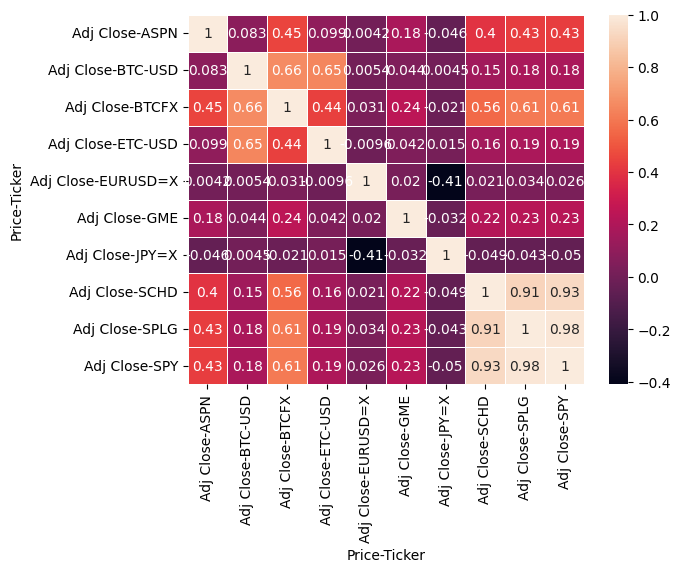

In [32]:
rets_corr = log_return.corr()

plt.style.use('default')
sns.heatmap(rets_corr, annot = True, linewidths = 0.5)
plt.show()

### Advanced Data Visualization:

Plot the following using Matplotlib or Seaborn:
▪ The cumulative return of the portfolio over time.
▪ A heatmap of the correlation matrix with annotations for correlation coefficients.
▪ Rolling volatility of the portfolio and individual assets to show risk dynamics over time.
▪ A drawdown curve that visualizes the periods where the portfolio experienced losses relative to its peak.

<Axes: title={'center': 'Portfolio Drawdown'}, xlabel='Date'>

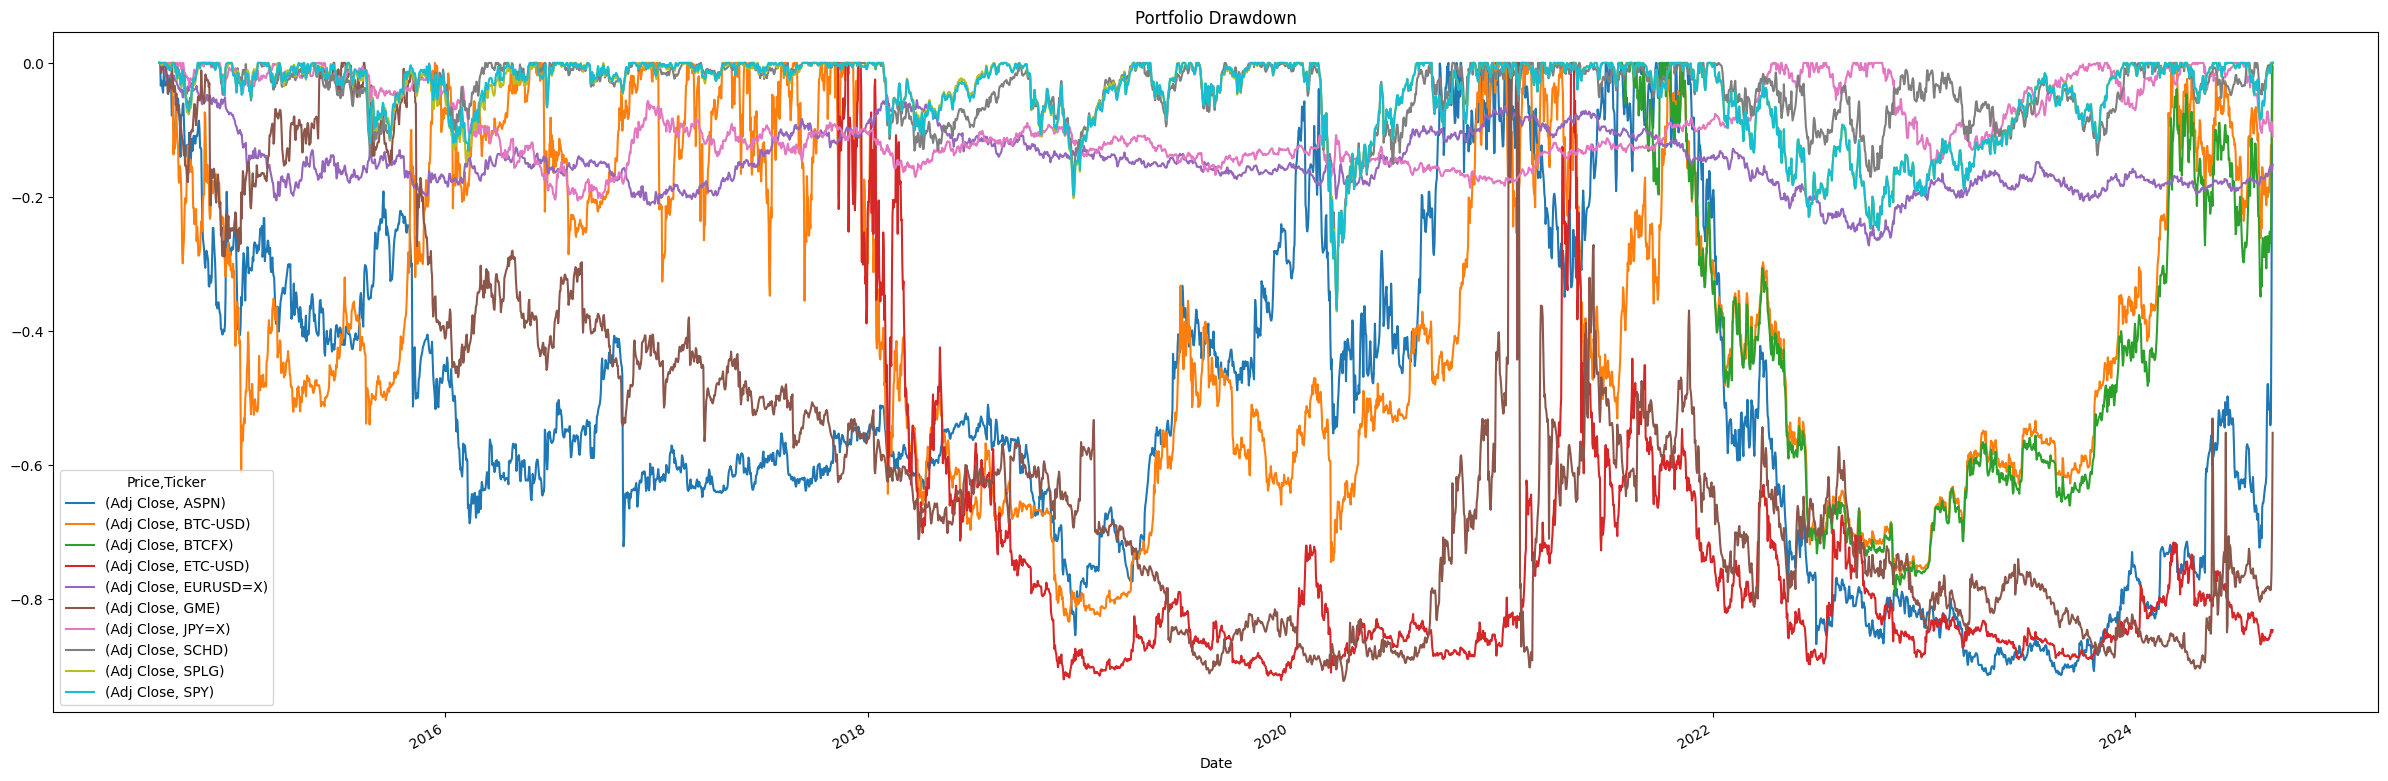

In [18]:
drawdown.plot(title='Portfolio Drawdown', figsize=(30, 10))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91458f8a-fcfb-48d9-a8d3-a7ea047a608f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>